In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
df = pd.read_csv("star_classification.csv")

In [6]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [8]:
from sklearn.preprocessing import LabelEncoder

lE = LabelEncoder()

lE.fit(df['class'])

df['target'] = lE.transform(df['class'])

In [12]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID,target
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171,0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427,0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299,0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775,0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842,0


In [16]:
df['target'].unique()

array([0, 1, 2])

In [20]:
print("Mapping:", dict(zip(lE.classes_, lE.transform(lE.classes_))))

Mapping: {'GALAXY': 0, 'QSO': 1, 'STAR': 2}


In [22]:
df_only_numbah = df.drop(columns='class')

In [24]:
df_only_numbah.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,target
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171,0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427,0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299,0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775,0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842,0


In [34]:
## Lets make three different dfs for each classification 

df_star = df_only_numbah[df_only_numbah['target'] == 2]
df_glxy = df_only_numbah[df_only_numbah['target'] == 0]
df_qso = df_only_numbah[df_only_numbah['target'] == 1]


In [38]:
df_star['target'].unique()

array([2])

In [40]:
df_glxy['target'].unique()

array([0])

In [42]:
df_qso['target'].unique()

array([1])

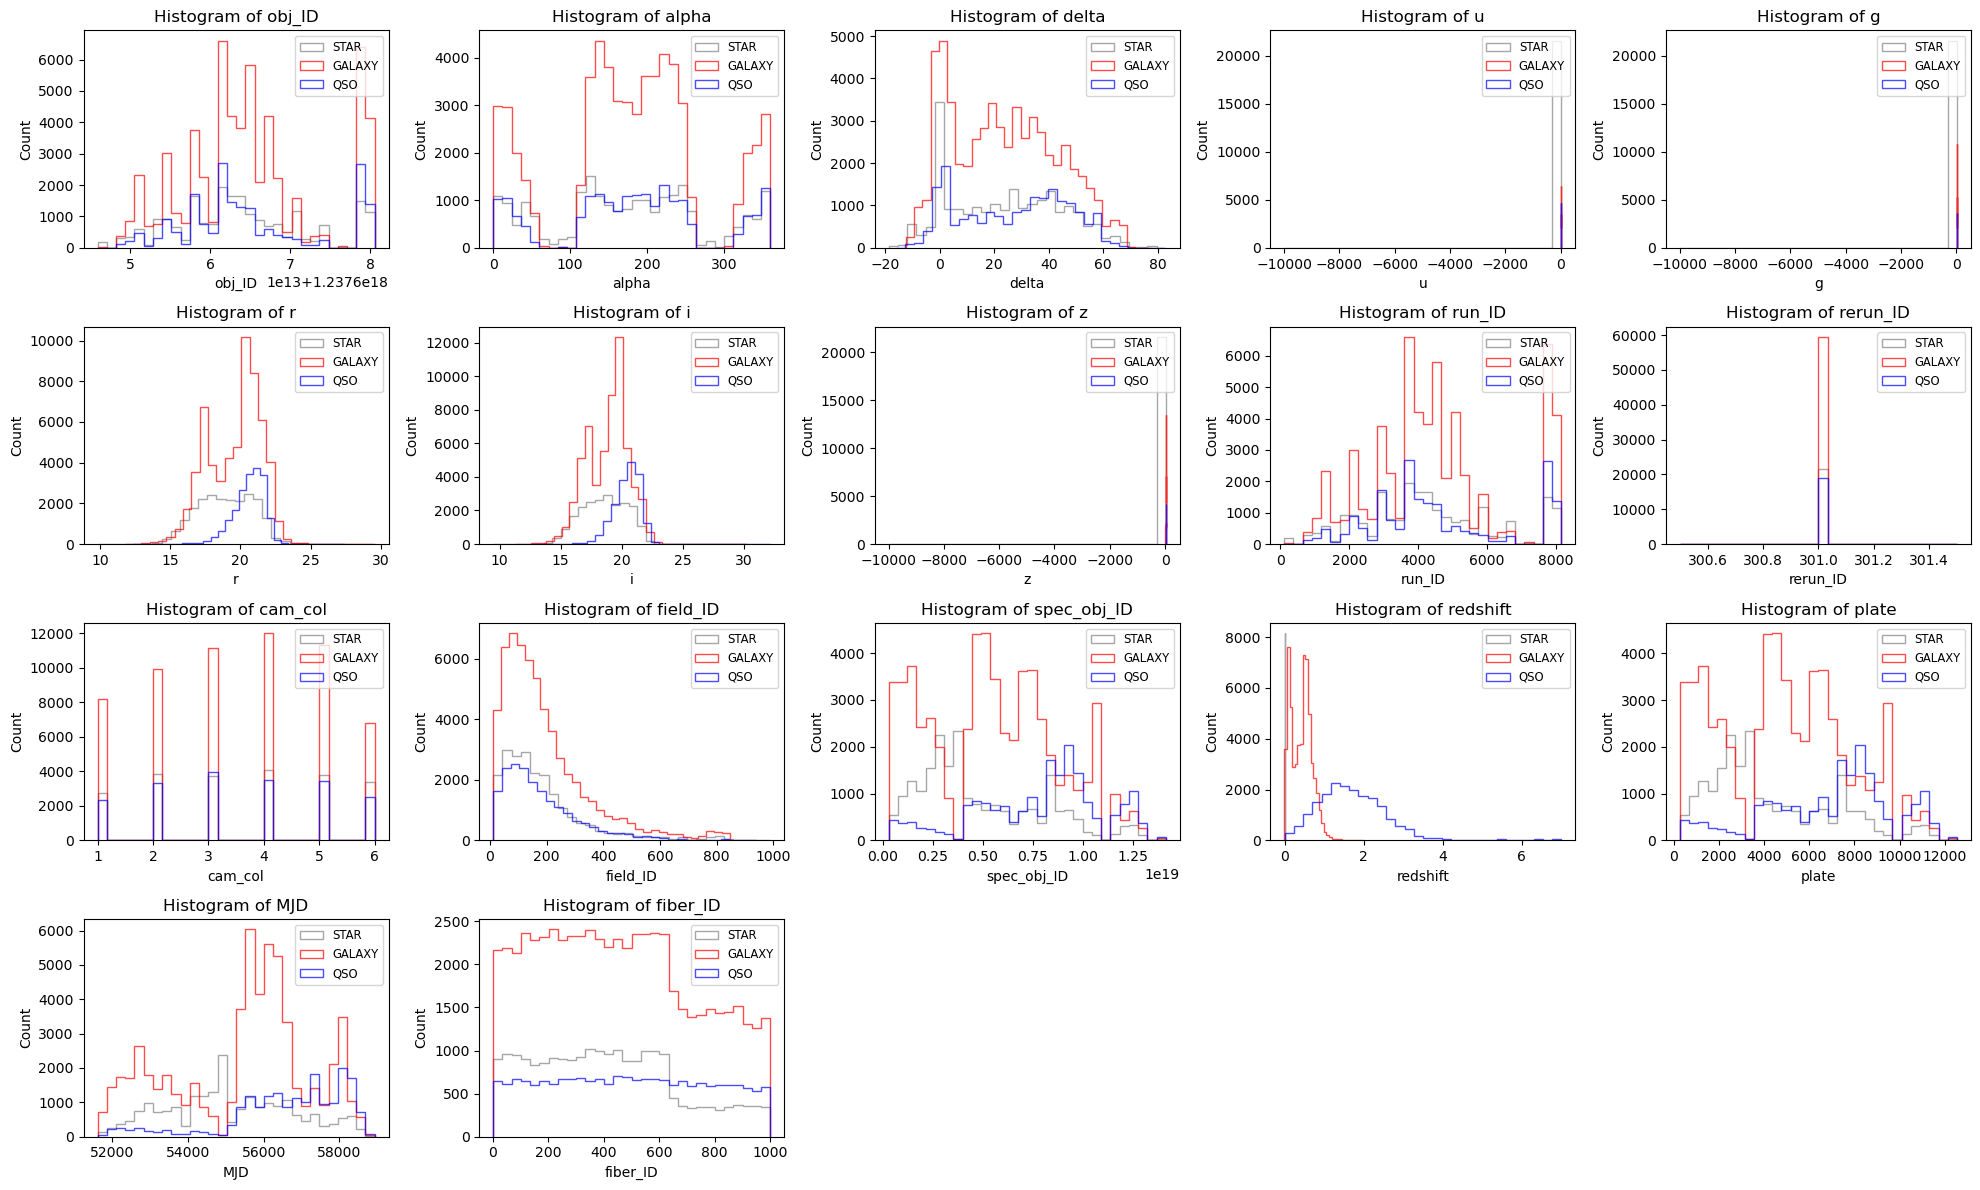

In [56]:
## now lets make some graphsss 

features = df_only_numbah.columns.drop('target')
n_features = len(features)

ncols = int(np.ceil(np.sqrt(n_features)))
nrows = int(np.ceil(n_features / ncols))

fig, axs = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows))
axs = axs.flatten()

for i, feature in enumerate(features):
    ax = axs[i]
    ax.hist(df_star[feature],  bins=30, histtype='step', alpha=0.7,color = 'Grey', label='STAR')
    ax.hist(df_glxy[feature],  bins=30, histtype='step', alpha=0.7,color = 'Red', label='GALAXY')
    ax.hist(df_qso[feature],   bins=30, histtype='step', alpha=0.7,color = 'Blue', label='QSO')
    ax.set_title(f"Histogram of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax.legend(loc='upper right', fontsize='small')

for j in range(i+1, len(axs)):
   fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

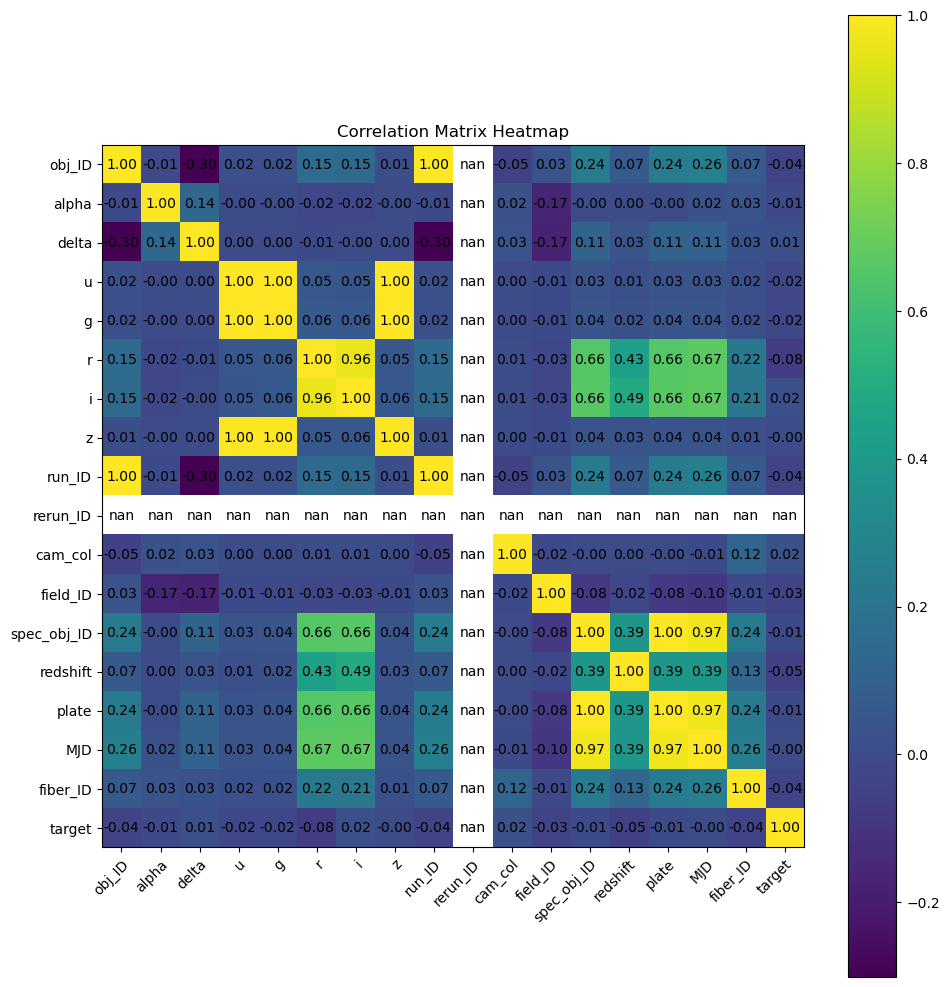

In [62]:
## correlation heatmap 

corr = df_only_numbah.corr()

fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(corr, interpolation='nearest')

# Configure ticks and labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.index)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.index)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Annotate each cell with its correlation value
for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        ax.text(j, i, f"{corr.iat[i, j]:.2f}", ha="center", va="center")

# Title and colorbar
ax.set_title("Correlation Matrix Heatmap")
fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

In [64]:
## Bro rerun_id is all 301 get rid of it 

df_only_numbah = df_only_numbah.drop(columns="rerun_ID")

In [69]:
## reload datasets


df_star = df_only_numbah[df_only_numbah['target'] == 2]
df_glxy = df_only_numbah[df_only_numbah['target'] == 0]
df_qso = df_only_numbah[df_only_numbah['target'] == 1]


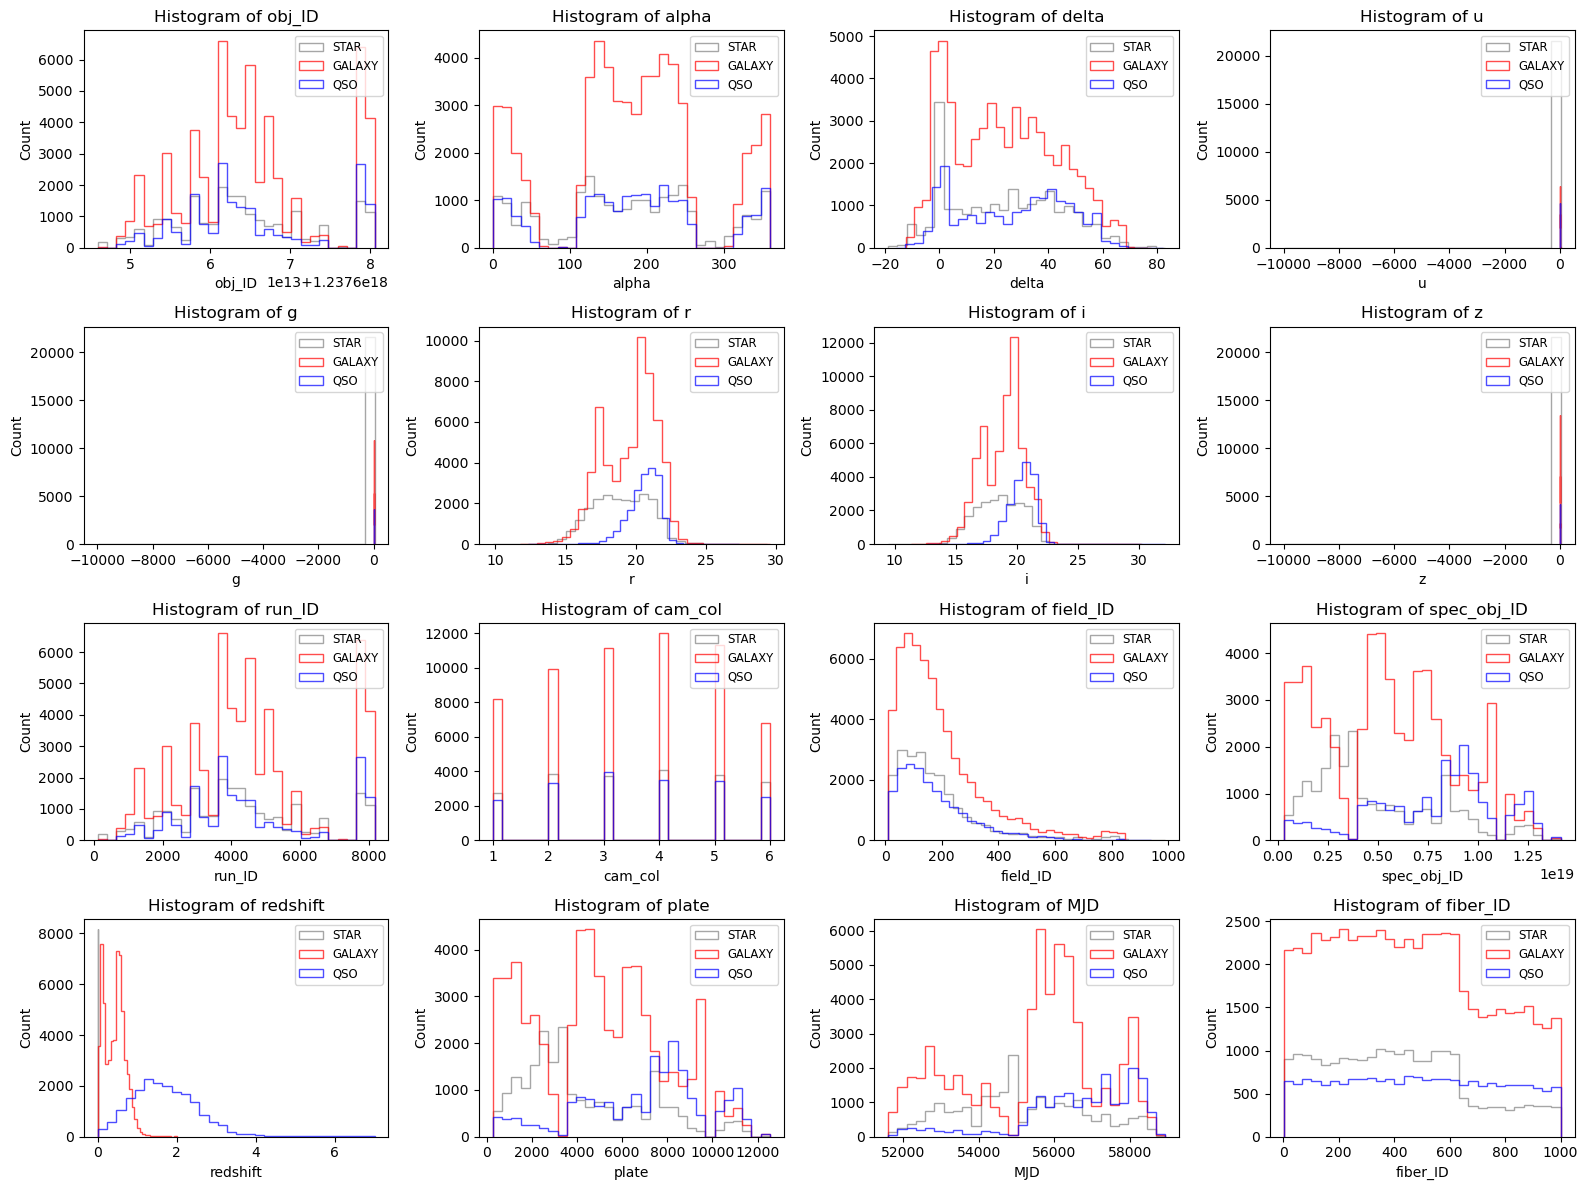

In [71]:
## now lets make some graphsss again

features = df_only_numbah.columns.drop('target')
n_features = len(features)

ncols = int(np.ceil(np.sqrt(n_features)))
nrows = int(np.ceil(n_features / ncols))

fig, axs = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows))
axs = axs.flatten()

for i, feature in enumerate(features):
    ax = axs[i]
    ax.hist(df_star[feature],  bins=30, histtype='step', alpha=0.7,color = 'Grey', label='STAR')
    ax.hist(df_glxy[feature],  bins=30, histtype='step', alpha=0.7,color = 'Red', label='GALAXY')
    ax.hist(df_qso[feature],   bins=30, histtype='step', alpha=0.7,color = 'Blue', label='QSO')
    ax.set_title(f"Histogram of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax.legend(loc='upper right', fontsize='small')

for j in range(i+1, len(axs)):
   fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

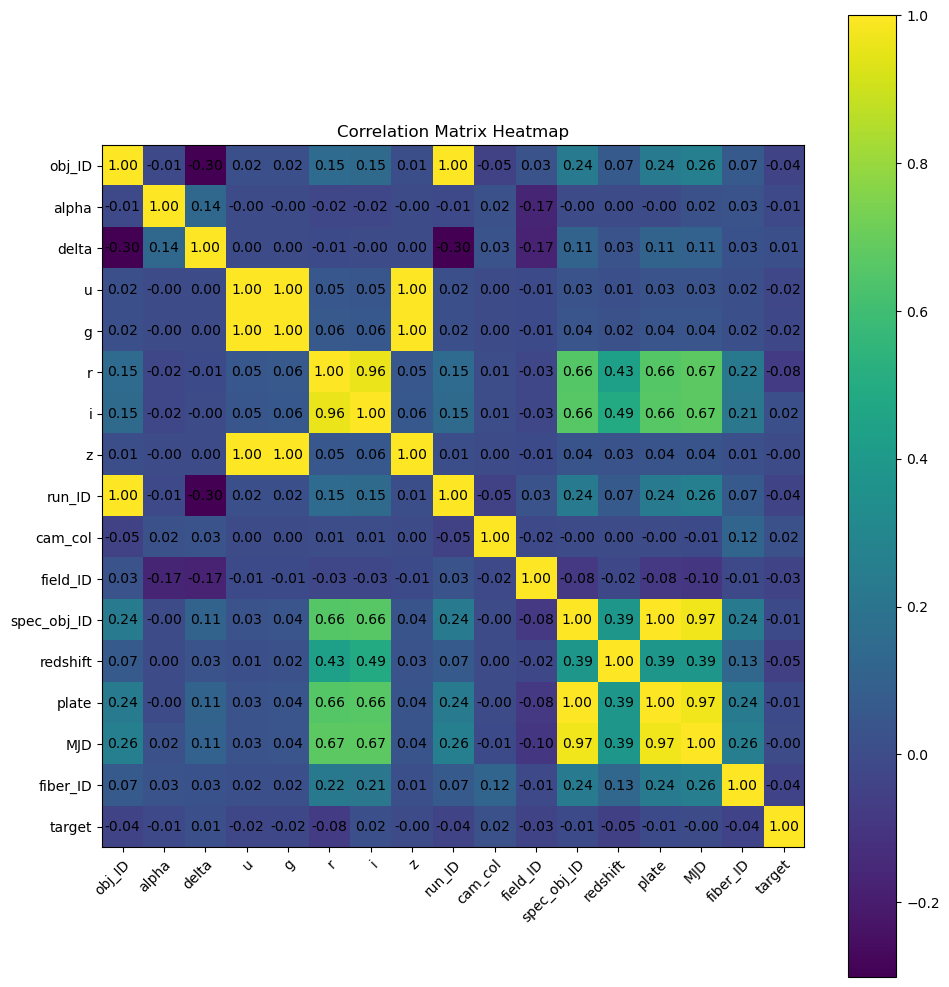

In [73]:
## correlation heatmap again

corr = df_only_numbah.corr()

fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(corr, interpolation='nearest')

# Configure ticks and labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.index)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.index)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Annotate each cell with its correlation value
for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        ax.text(j, i, f"{corr.iat[i, j]:.2f}", ha="center", va="center")

# Title and colorbar
ax.set_title("Correlation Matrix Heatmap")
fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

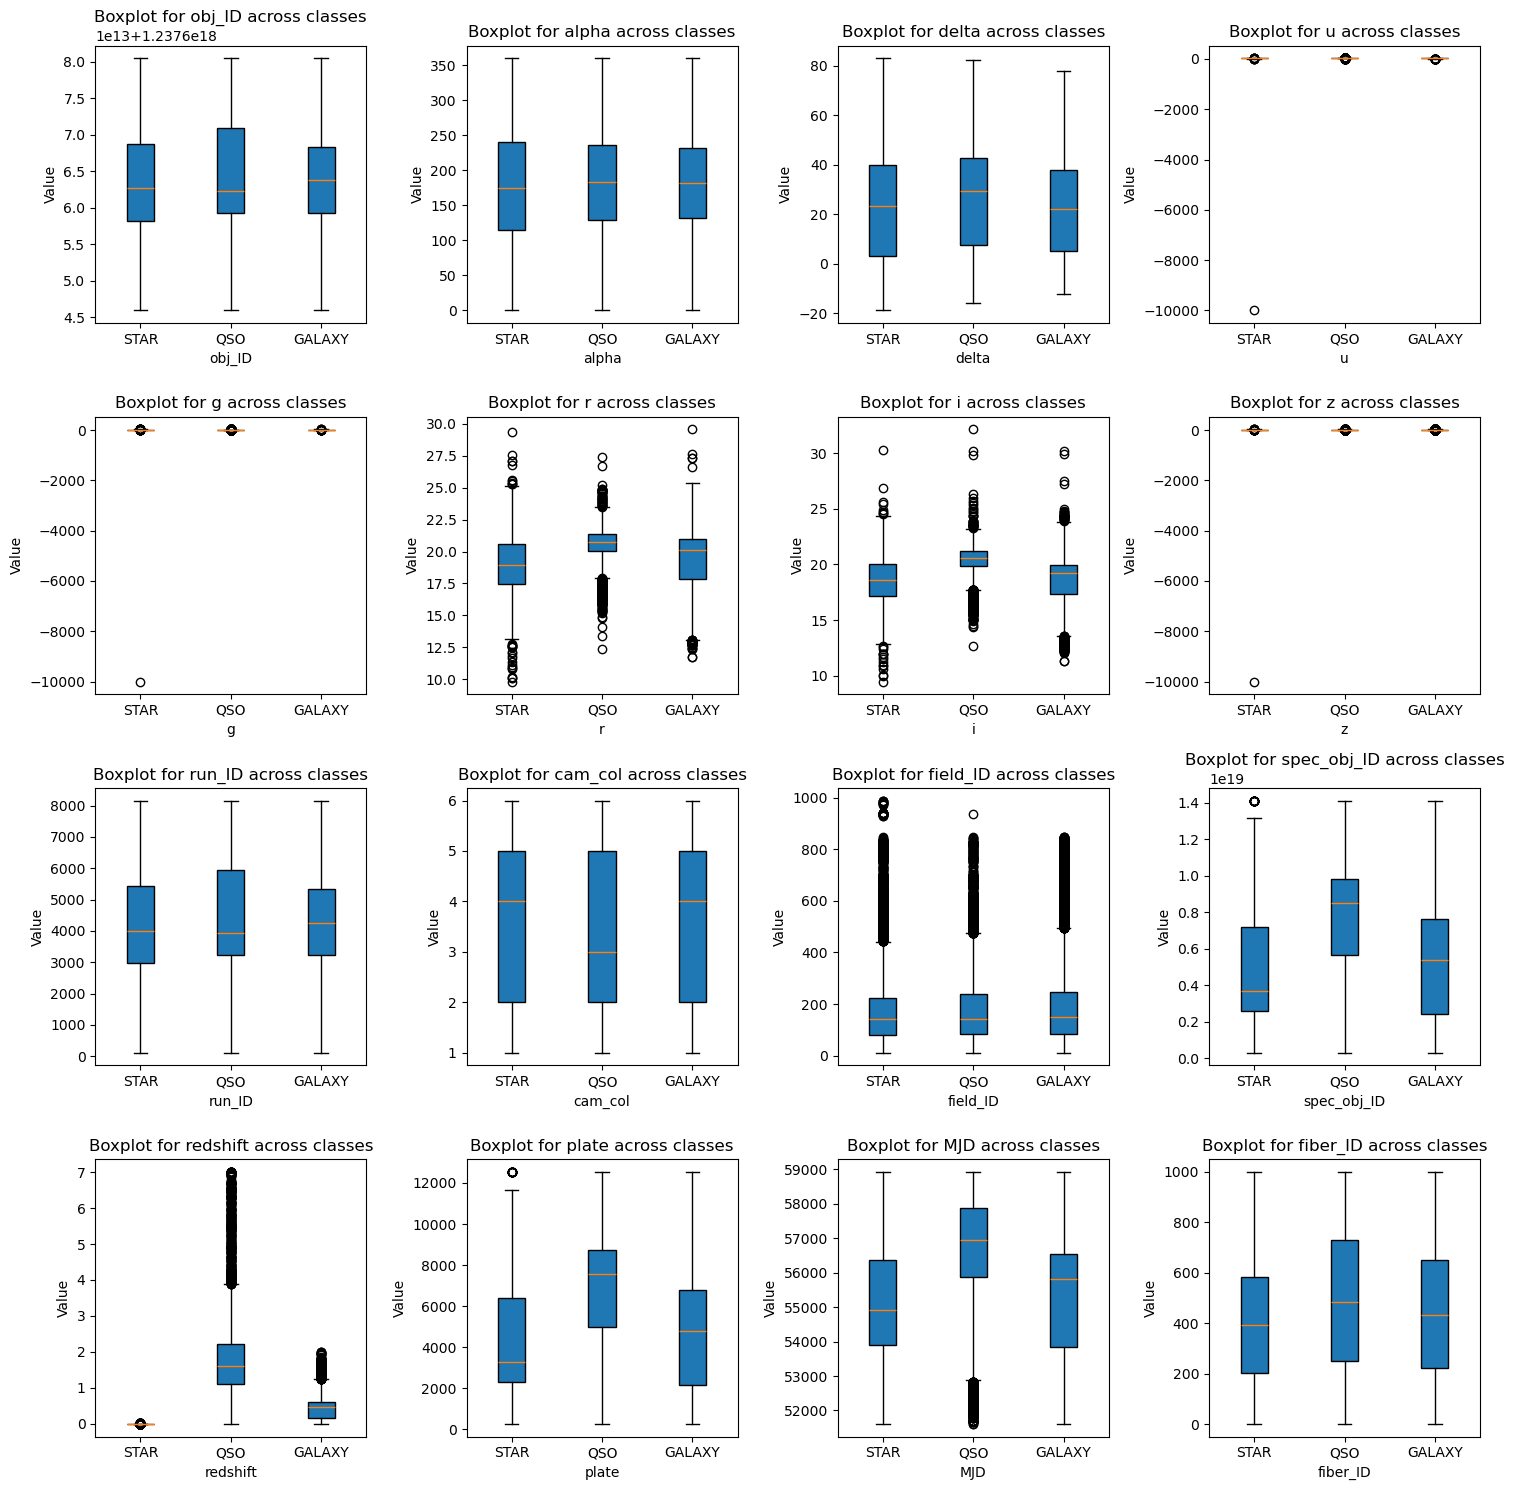

In [77]:
## There are outliers!!! Boxplots !! 

ncols = int(math.ceil(math.sqrt(n_features)))
nrows = int(math.ceil(n_features / ncols))

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 15))
axs = axs.flatten()  

for i, feature in enumerate(features):
    ax = axs[i]
    data_to_plot = [
        pd.to_numeric(df_star[feature].dropna(), errors='coerce').values,  
        pd.to_numeric(df_qso[feature].dropna(), errors='coerce').values,  
        pd.to_numeric(df_glxy[feature].dropna(), errors='coerce').values   
    ]
    labels = ['STAR', 'QSO', 'GALAXY']
    
    ax.boxplot(data_to_plot, patch_artist=True, tick_labels=labels)
    
    ax.set_xlabel(feature)
    ax.set_ylabel("Value")
    ax.set_title(f"Boxplot for {feature} across classes")

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [79]:
df_star[['u','g','z']].describe()

,u,g,z
count,21594.000000,21594.000000,21594.000000
mean,20.689805,19.153188,17.870400
std,68.228825,68.210460,68.193708
min,-9999.000000,-9999.000000,-9999.000000
25%,19.327275,18.034847,16.963810
50%,21.010555,19.542825,18.319225
75%,22.960617,21.228690,19.729615
max,30.660390,30.607000,26.427790


In [81]:
# U, G, & Z, in the star class are giving trouble of outlier.
# Professor Farbin mentioned this was a common practice in physics. nobueno

# find the rows where in this outlier lies
features = ['u', 'g', 'z']

rows_dict = {feature: df[df[feature] == -9999] for feature in features}

print("Rows in column 'u' with -9999:")
print(rows_dict['u'])
    

Rows in column 'u' with -9999:
             obj_ID       alpha     delta       u       g        r         i  \
79543  1.237649e+18  224.006526 -0.624304 -9999.0 -9999.0  18.1656  18.01675   

            z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID class  \
79543 -9999.0     752       301        2       537  3.731277e+18  STAR   

       redshift  plate    MJD  fiber_ID  target  
79543  0.000089   3314  54970       162       2  


In [83]:
df_star = df_star.drop([79543])

In [85]:
## Reload graphs  

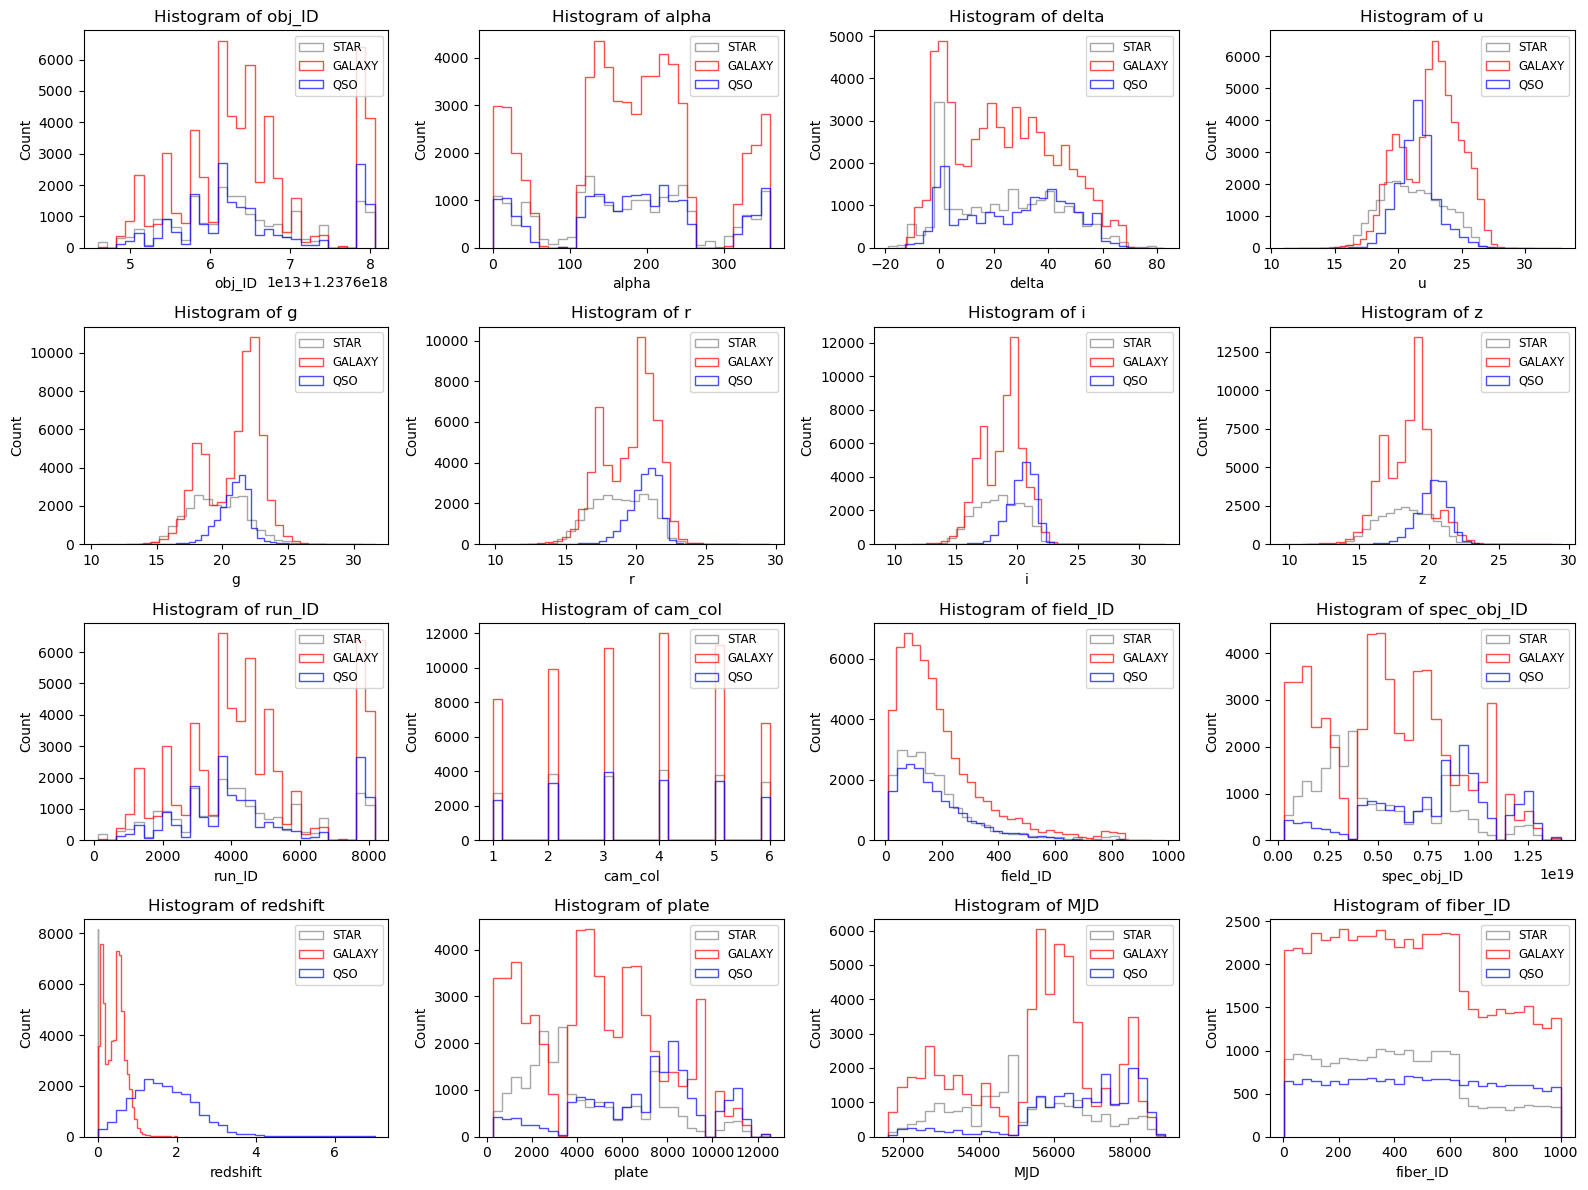

In [88]:
## now lets make some graphsss again

features = df_only_numbah.columns.drop('target')
n_features = len(features)

ncols = int(np.ceil(np.sqrt(n_features)))
nrows = int(np.ceil(n_features / ncols))

fig, axs = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows))
axs = axs.flatten()

for i, feature in enumerate(features):
    ax = axs[i]
    ax.hist(df_star[feature],  bins=30, histtype='step', alpha=0.7,color = 'Grey', label='STAR')
    ax.hist(df_glxy[feature],  bins=30, histtype='step', alpha=0.7,color = 'Red', label='GALAXY')
    ax.hist(df_qso[feature],   bins=30, histtype='step', alpha=0.7,color = 'Blue', label='QSO')
    ax.set_title(f"Histogram of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax.legend(loc='upper right', fontsize='small')

for j in range(i+1, len(axs)):
   fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

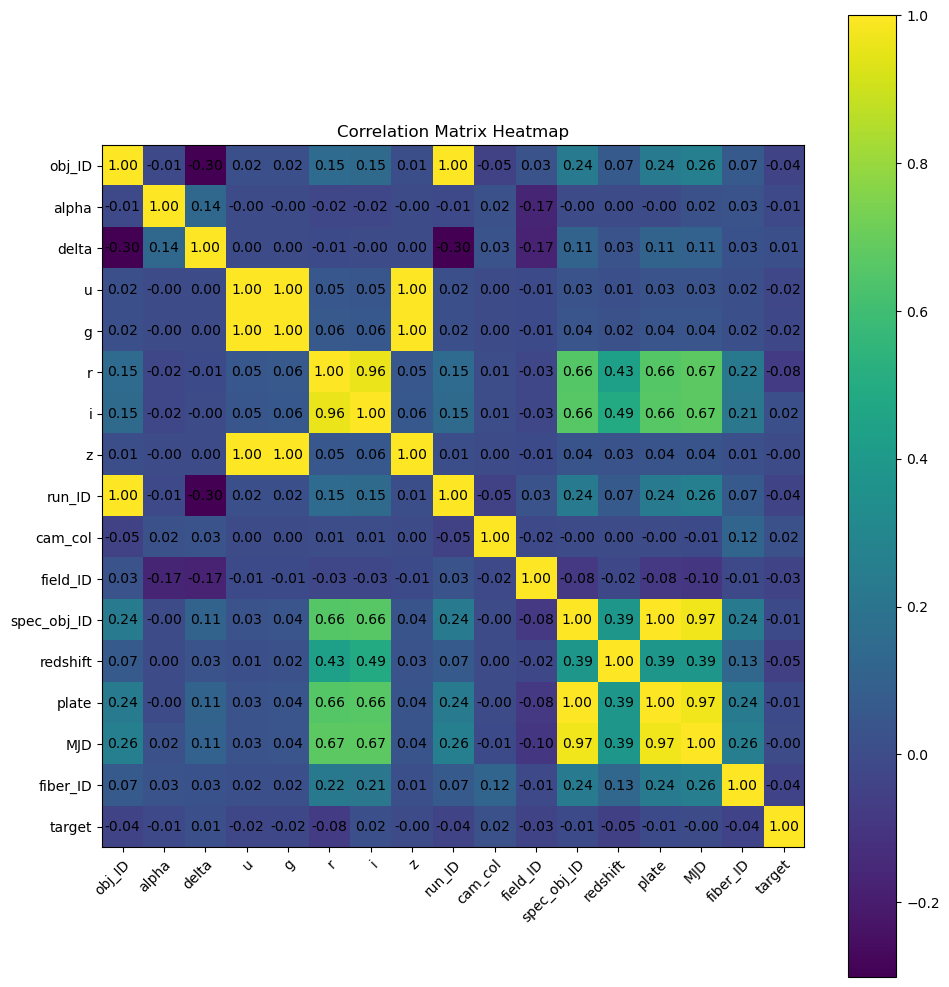

In [90]:
## correlation heatmap again

corr = df_only_numbah.corr()

fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(corr, interpolation='nearest')

# Configure ticks and labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.index)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.index)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Annotate each cell with its correlation value
for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        ax.text(j, i, f"{corr.iat[i, j]:.2f}", ha="center", va="center")

# Title and colorbar
ax.set_title("Correlation Matrix Heatmap")
fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

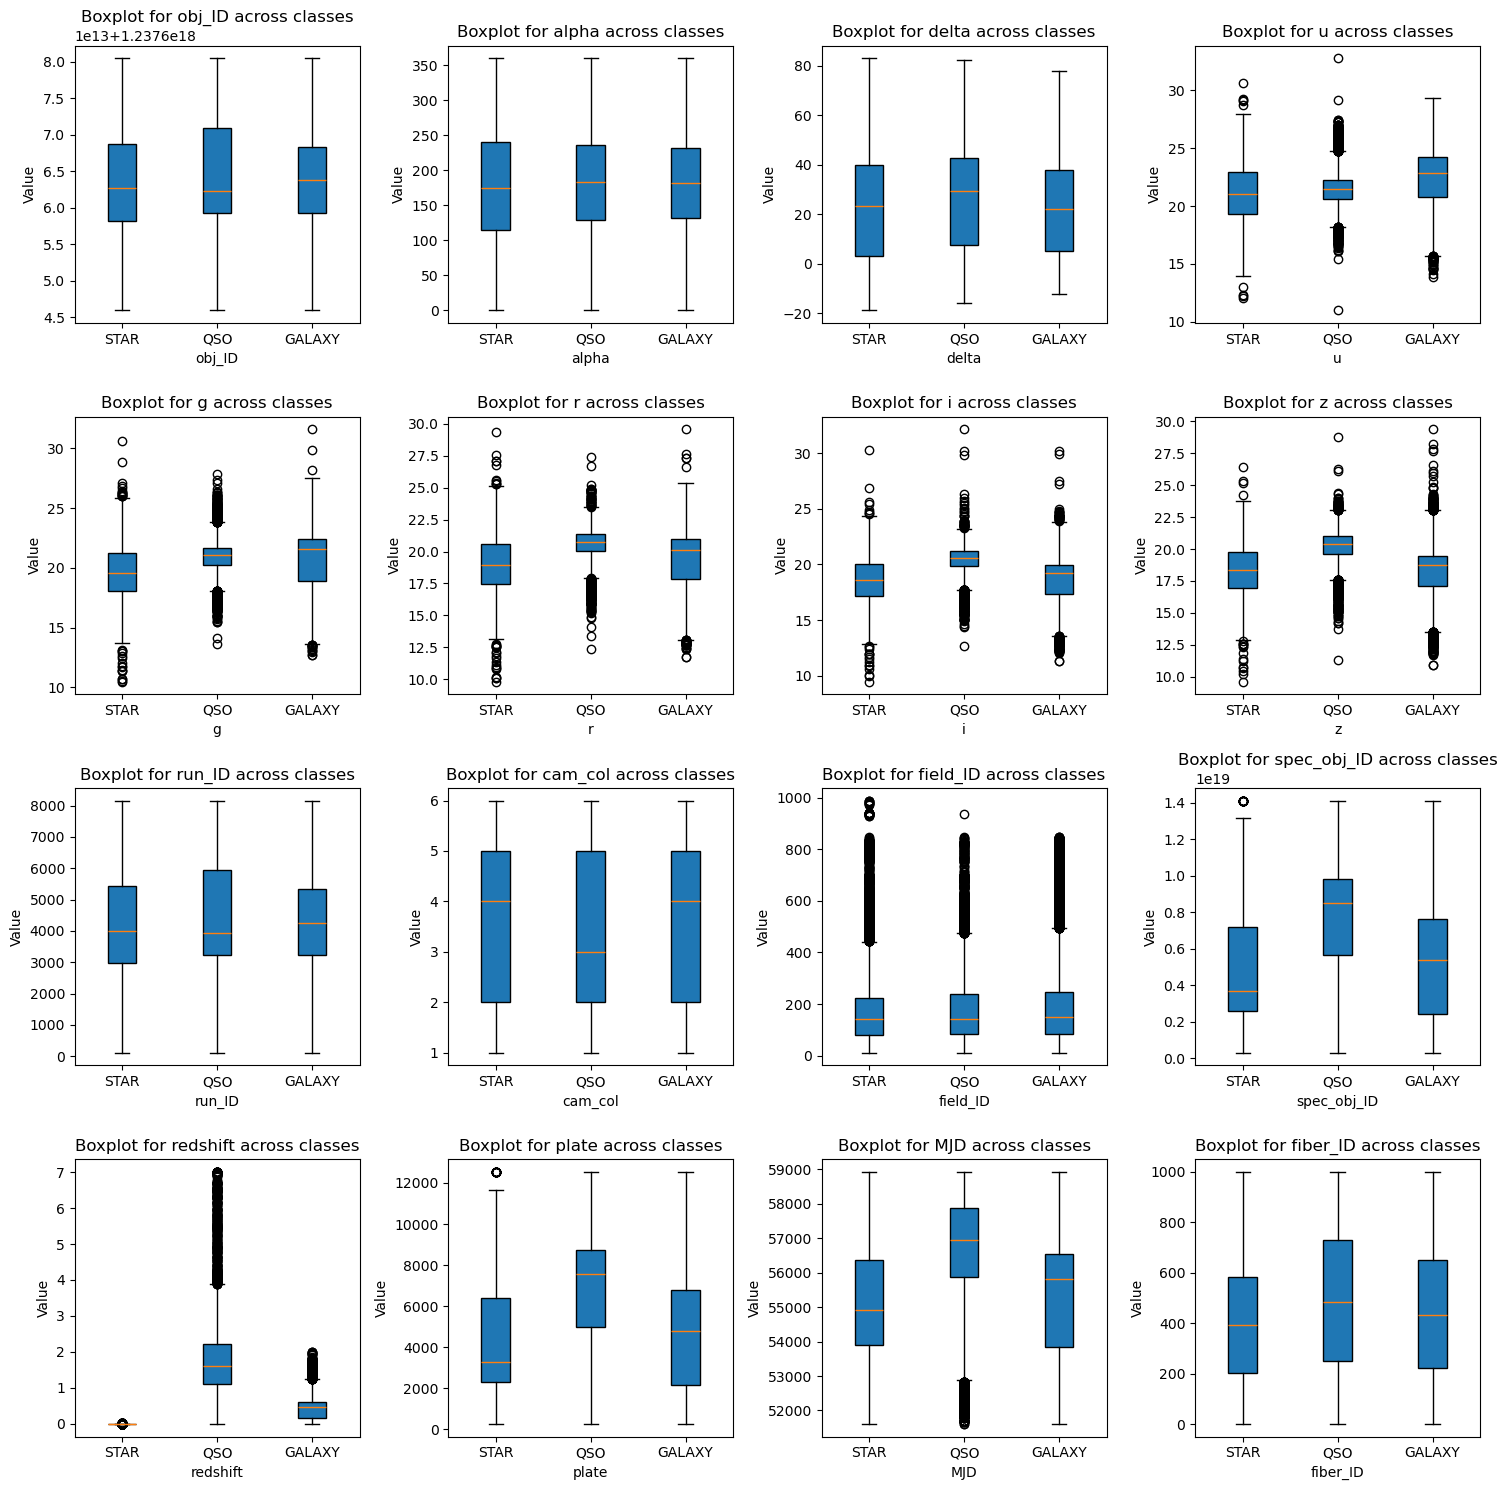

In [92]:
## There are outliers!!! Boxplots !! 

ncols = int(math.ceil(math.sqrt(n_features)))
nrows = int(math.ceil(n_features / ncols))

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 15))
axs = axs.flatten()  

for i, feature in enumerate(features):
    ax = axs[i]
    data_to_plot = [
        pd.to_numeric(df_star[feature].dropna(), errors='coerce').values,  
        pd.to_numeric(df_qso[feature].dropna(), errors='coerce').values,  
        pd.to_numeric(df_glxy[feature].dropna(), errors='coerce').values   
    ]
    labels = ['STAR', 'QSO', 'GALAXY']
    
    ax.boxplot(data_to_plot, patch_artist=True, tick_labels=labels)
    
    ax.set_xlabel(feature)
    ax.set_ylabel("Value")
    ax.set_title(f"Boxplot for {feature} across classes")

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

## list of super similar features 
- run_id & obj_id
- u & g & z
- i & r
- spec_obj_id & plate & MJD

... but why?

In [98]:
# finds columns whose entire series exactly match another
dup_cols = df_only_numbah.columns[df_only_numbah.T.duplicated()]
print("Exact-duplicate columns:", dup_cols.tolist())

Exact-duplicate columns: []


In [100]:
import itertools, numpy as np

tol = 1e-8
near_dups = []
for c1, c2 in itertools.combinations(features, 2):
    if np.allclose(df[c1], df[c2], atol=tol):
        near_dups.append((c1, c2))
print("Nearly identical pairs:", near_dups)

Nearly identical pairs: []


In [102]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(df[[c1]], df[c2])
resid = df[c2] - (lr.coef_[0]*df[c1] + lr.intercept_)
print(f"{c1} → {c2}: slope={lr.coef_[0]:.3f}, intercept={lr.intercept_:.3g}, max_resid={resid.abs().max():.3g}")

MJD → fiber_ID: slope=0.039, intercept=-1.7e+03, max_resid=567


In [104]:
diff = (df[c1] - df[c2]).abs()
print(diff.describe())  # see if min≈max≈0

count    100000.000000
mean      55139.334760
std        1758.293636
min       50971.000000
25%       53963.000000
50%       55361.000000
75%       56363.000000
max       58918.000000
dtype: float64


In [107]:
df_only_numbah.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate', 'MJD',
       'fiber_ID', 'target'],
      dtype='object')

In [117]:
## I think removing all the ID features would contribute to a better model 
drop_cols = ['obj_ID','run_ID','field_ID','spec_obj_ID','fiber_ID']
df_only_numbah = df_only_numbah.drop(columns=drop_cols, errors='ignore')

In [119]:
df_only_numbah.head()

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD,target
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,0.634794,5812,56354,0
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,0.779136,10445,58158,0
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,0.644195,4576,55592,0
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,0.932346,9149,58039,0
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,0.116123,6121,56187,0


In [121]:
## also droppping cam_col cause thats like which camera captured it and I think its 
## just like administration information

df_only_numbah = df_only_numbah.drop(columns='cam_col')

In [133]:
## and also MJD thats just a Modified Julian DATE!! 
df_only_numbah = df_only_numbah.drop(columns='MJD')

In [143]:
df_only_numbah = df_only_numbah.drop(columns='plate')

In [145]:
df_only_numbah.head()

,alpha,delta,u,g,r,i,z,redshift,target
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,0
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,0
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,0
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,0
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,0


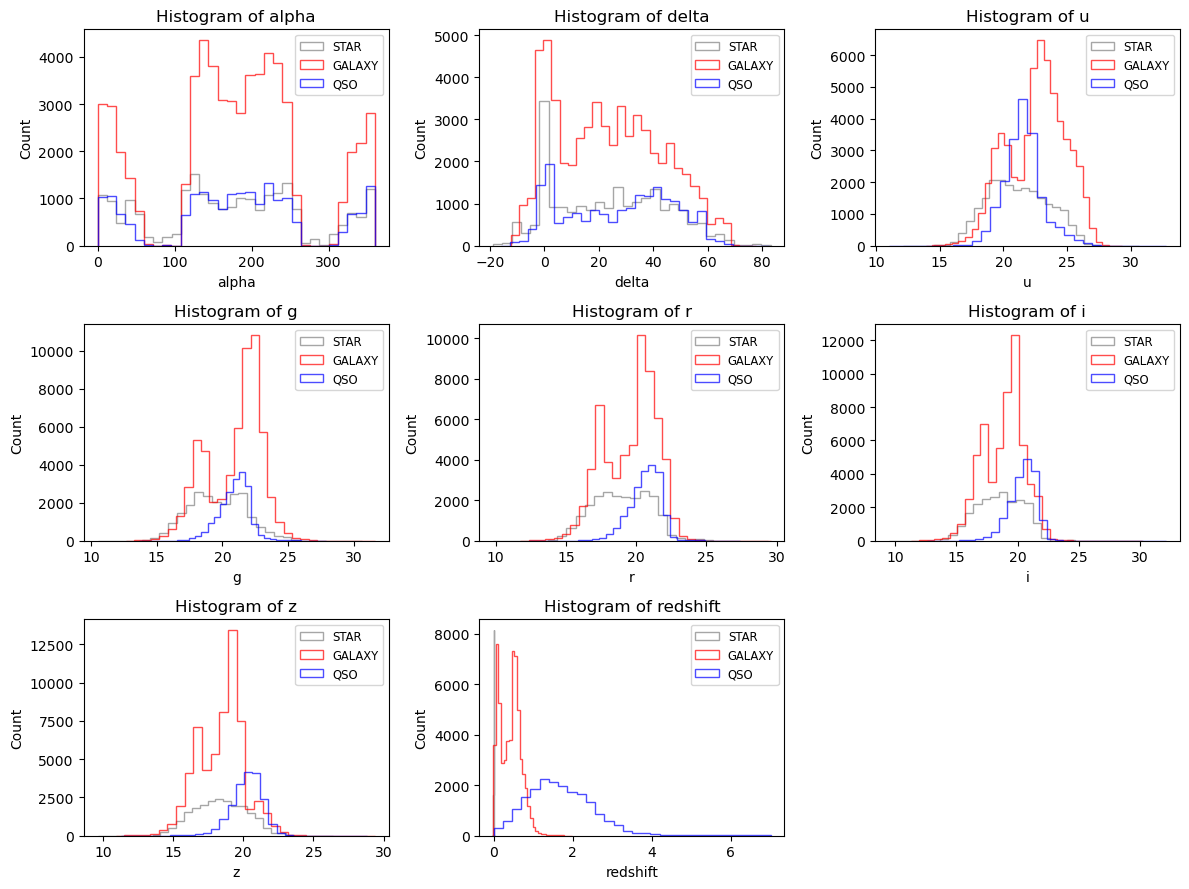

In [147]:
## now lets make some graphsss v3

features = df_only_numbah.columns.drop('target')
n_features = len(features)

ncols = int(np.ceil(np.sqrt(n_features)))
nrows = int(np.ceil(n_features / ncols))

fig, axs = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows))
axs = axs.flatten()

for i, feature in enumerate(features):
    ax = axs[i]
    ax.hist(df_star[feature],  bins=30, histtype='step', alpha=0.7,color = 'Grey', label='STAR')
    ax.hist(df_glxy[feature],  bins=30, histtype='step', alpha=0.7,color = 'Red', label='GALAXY')
    ax.hist(df_qso[feature],   bins=30, histtype='step', alpha=0.7,color = 'Blue', label='QSO')
    ax.set_title(f"Histogram of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax.legend(loc='upper right', fontsize='small')

for j in range(i+1, len(axs)):
   fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

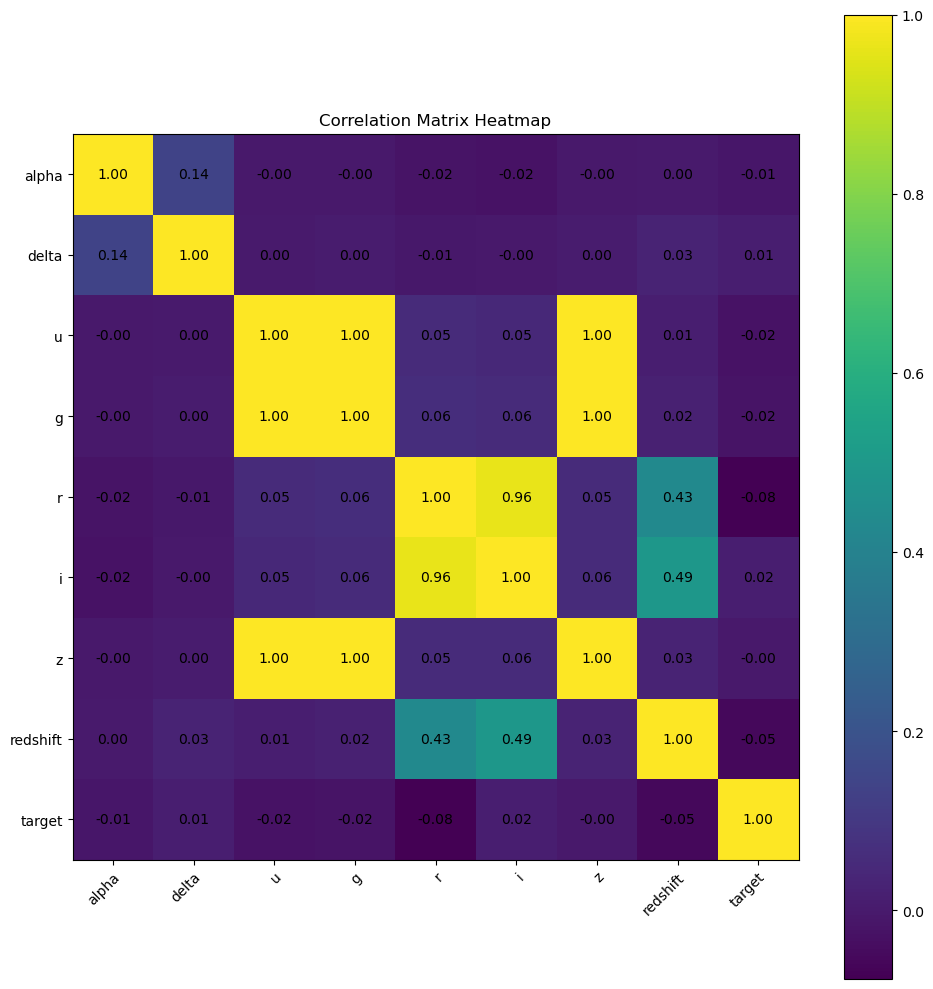

In [149]:
## correlation heatmap again v3

corr = df_only_numbah.corr()

fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(corr, interpolation='nearest')

# Configure ticks and labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.index)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.index)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Annotate each cell with its correlation value
for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        ax.text(j, i, f"{corr.iat[i, j]:.2f}", ha="center", va="center")

# Title and colorbar
ax.set_title("Correlation Matrix Heatmap")
fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

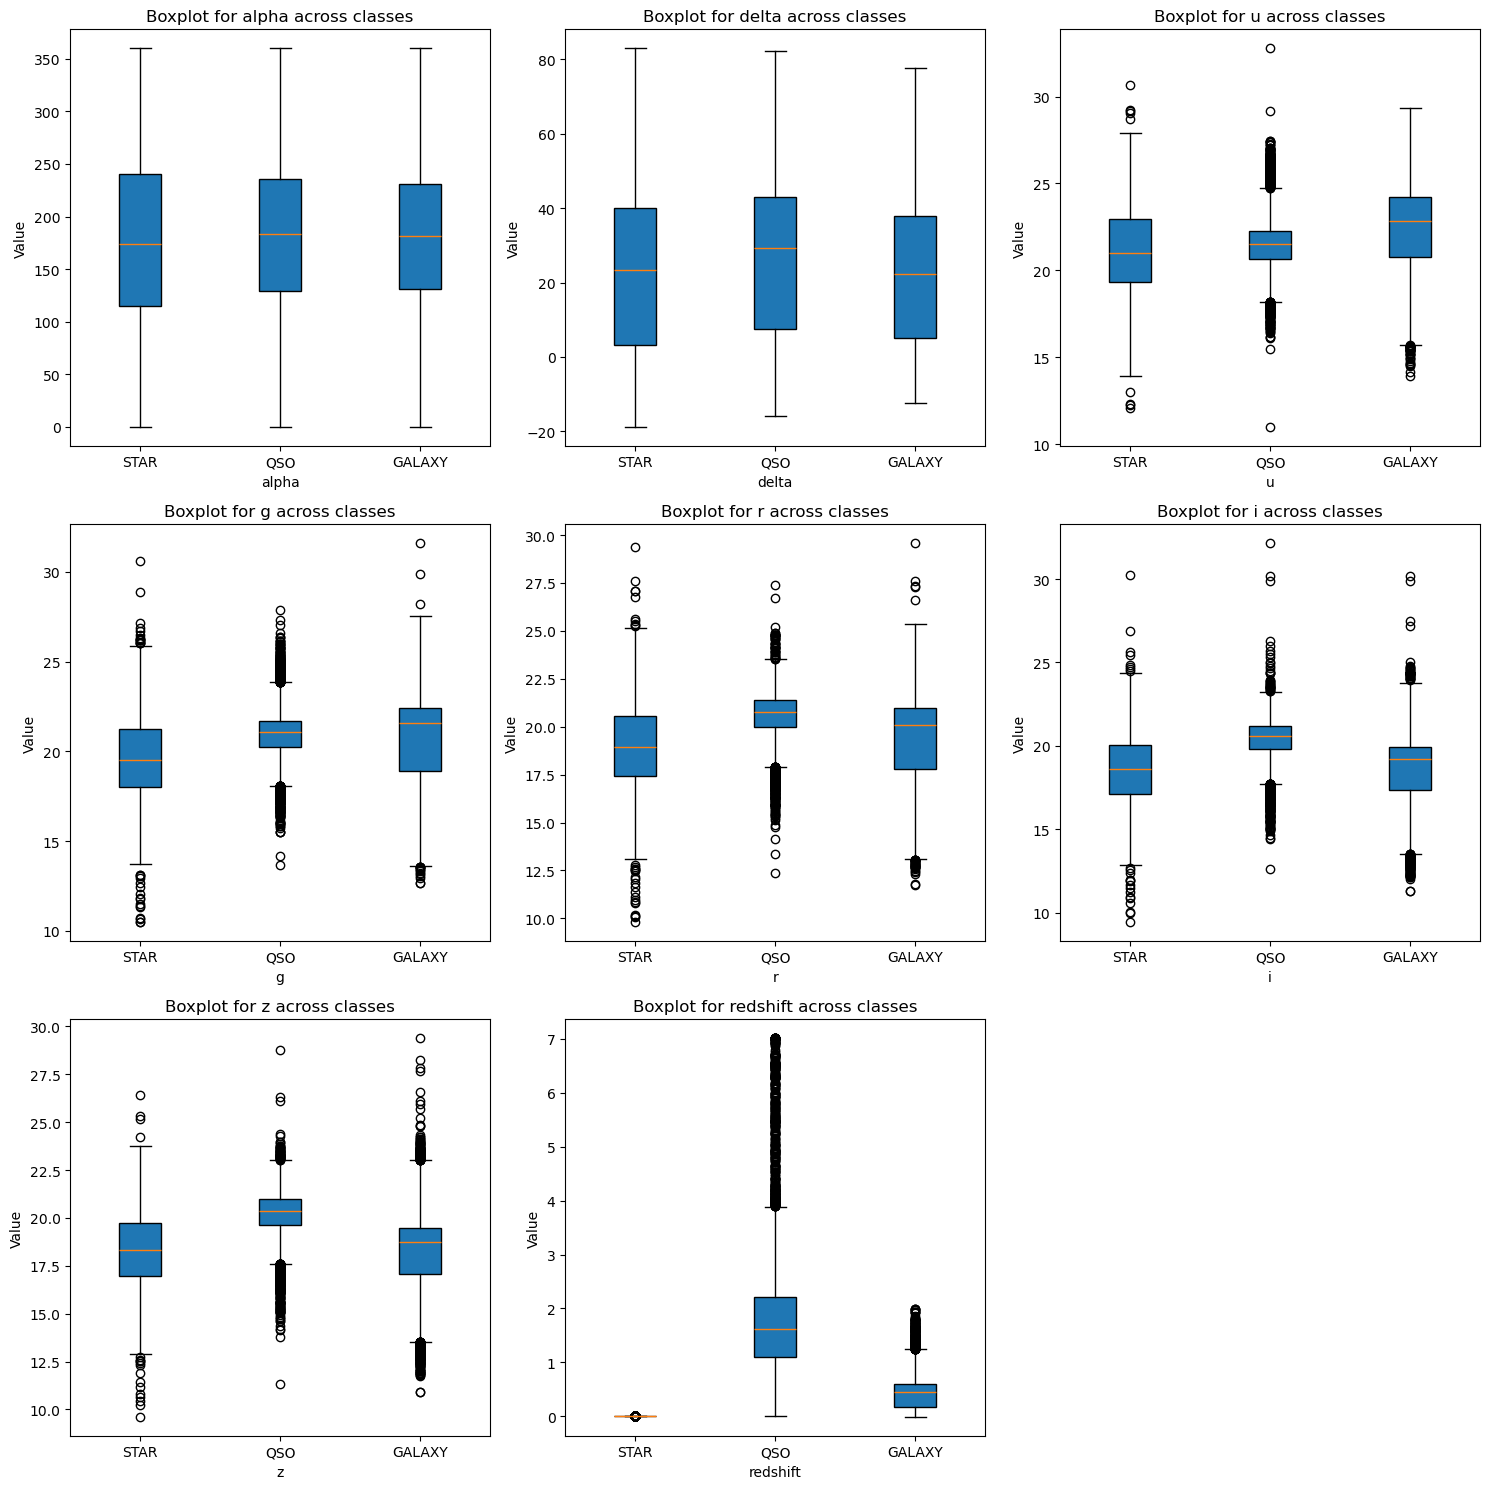

In [151]:
## There are outliers!!! Boxplots !! v3

ncols = int(math.ceil(math.sqrt(n_features)))
nrows = int(math.ceil(n_features / ncols))

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 15))
axs = axs.flatten()  

for i, feature in enumerate(features):
    ax = axs[i]
    data_to_plot = [
        pd.to_numeric(df_star[feature].dropna(), errors='coerce').values,  
        pd.to_numeric(df_qso[feature].dropna(), errors='coerce').values,  
        pd.to_numeric(df_glxy[feature].dropna(), errors='coerce').values   
    ]
    labels = ['STAR', 'QSO', 'GALAXY']
    
    ax.boxplot(data_to_plot, patch_artist=True, tick_labels=labels)
    
    ax.set_xlabel(feature)
    ax.set_ylabel("Value")
    ax.set_title(f"Boxplot for {feature} across classes")

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [153]:
df_only_numbah.head()

,alpha,delta,u,g,r,i,z,redshift,target
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,0
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,0
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,0
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,0
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,0


In [155]:
df_only_numbah = df_only_numbah.drop(columns='alpha')

In [157]:
df_only_numbah = df_only_numbah.drop(columns='delta')

In [159]:
df_only_numbah.head()

,u,g,r,i,z,redshift,target
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,0
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,0
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,0
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,0
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,0


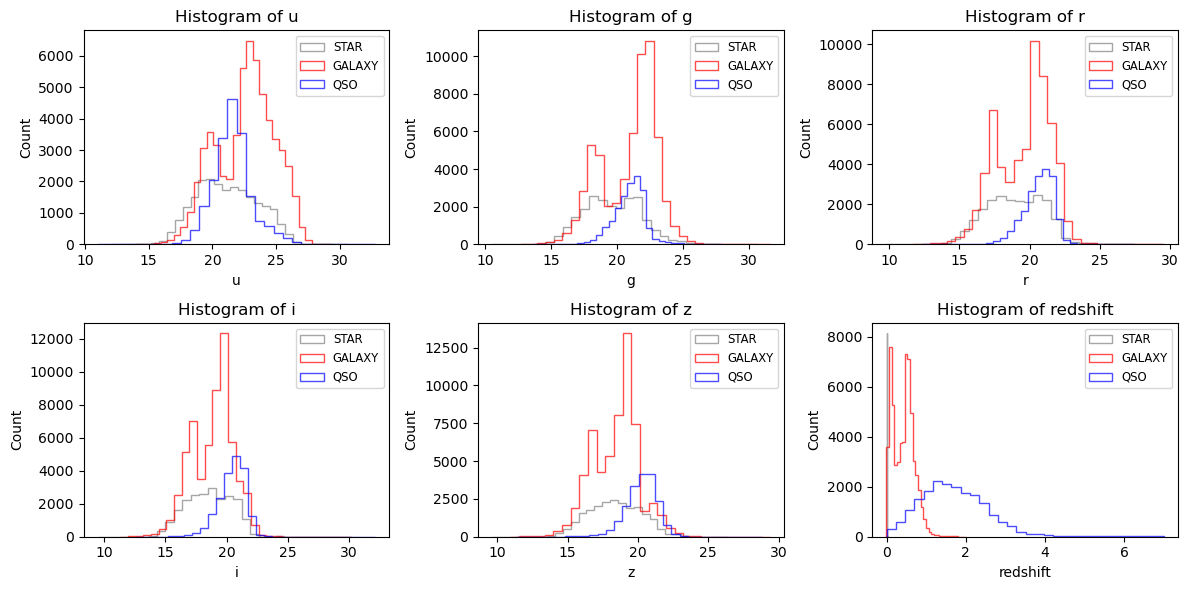

In [161]:
## now lets make some graphsss v4

features = df_only_numbah.columns.drop('target')
n_features = len(features)

ncols = int(np.ceil(np.sqrt(n_features)))
nrows = int(np.ceil(n_features / ncols))

fig, axs = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows))
axs = axs.flatten()

for i, feature in enumerate(features):
    ax = axs[i]
    ax.hist(df_star[feature],  bins=30, histtype='step', alpha=0.7,color = 'Grey', label='STAR')
    ax.hist(df_glxy[feature],  bins=30, histtype='step', alpha=0.7,color = 'Red', label='GALAXY')
    ax.hist(df_qso[feature],   bins=30, histtype='step', alpha=0.7,color = 'Blue', label='QSO')
    ax.set_title(f"Histogram of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax.legend(loc='upper right', fontsize='small')

for j in range(i+1, len(axs)):
   fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

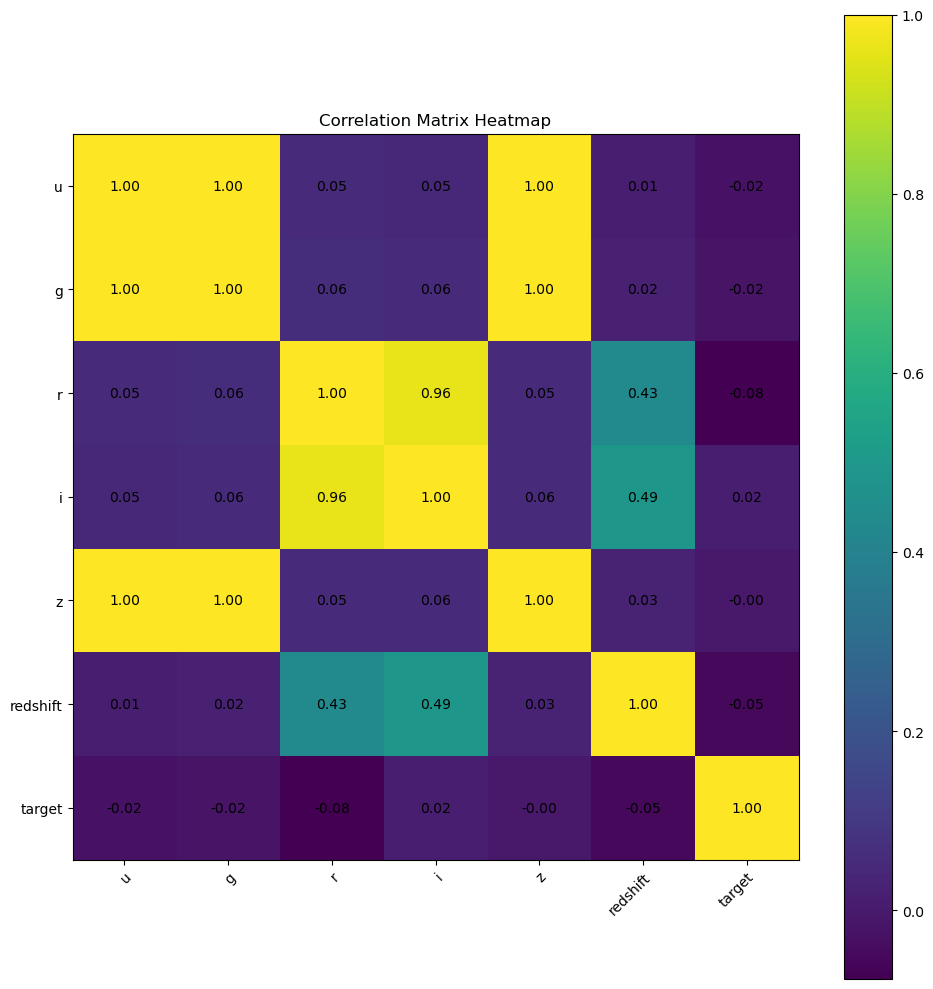

In [162]:
## correlation heatmap again v4

corr = df_only_numbah.corr()

fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(corr, interpolation='nearest')

# Configure ticks and labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.index)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.index)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Annotate each cell with its correlation value
for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        ax.text(j, i, f"{corr.iat[i, j]:.2f}", ha="center", va="center")

# Title and colorbar
ax.set_title("Correlation Matrix Heatmap")
fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

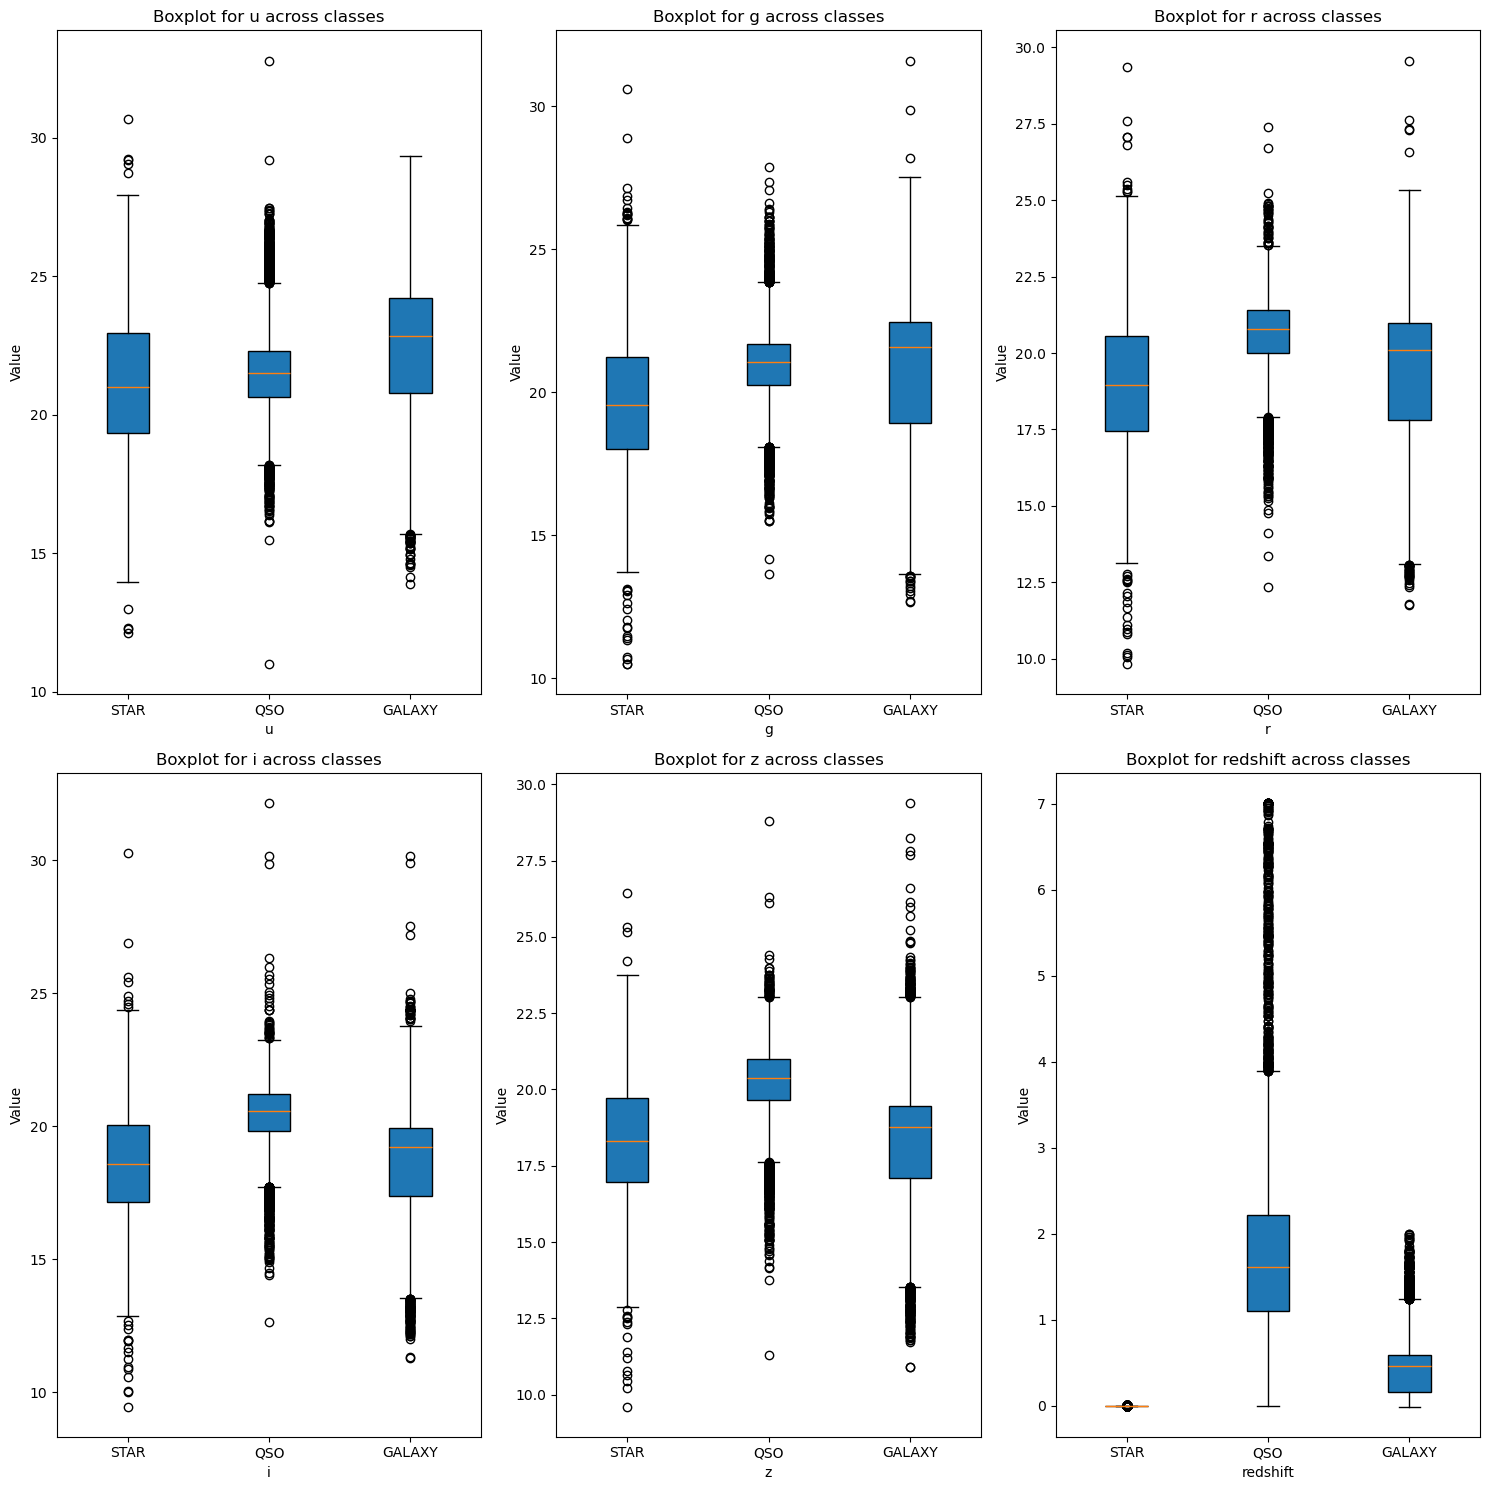

In [163]:
## There are outliers!!! Boxplots !! v3

ncols = int(math.ceil(math.sqrt(n_features)))
nrows = int(math.ceil(n_features / ncols))

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 15))
axs = axs.flatten()  

for i, feature in enumerate(features):
    ax = axs[i]
    data_to_plot = [
        pd.to_numeric(df_star[feature].dropna(), errors='coerce').values,  
        pd.to_numeric(df_qso[feature].dropna(), errors='coerce').values,  
        pd.to_numeric(df_glxy[feature].dropna(), errors='coerce').values   
    ]
    labels = ['STAR', 'QSO', 'GALAXY']
    
    ax.boxplot(data_to_plot, patch_artist=True, tick_labels=labels)
    
    ax.set_xlabel(feature)
    ax.set_ylabel("Value")
    ax.set_title(f"Boxplot for {feature} across classes")

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [171]:
df_only_numbah = df_only_numbah.drop([79543])

In [173]:
df_only_numbah.to_csv("6_features.csv", index=False)

In [175]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histograms_by_class(
    df,
    target_col,
    class_colors=None,
    bins=30,
    histtype='step',
    alpha=0.7,
    figsize=(10, 10),
    legend_loc='upper right'
):
    """
    Plot overlaid histograms for each feature in df, split by class.

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame containing features and the target column.
    target_col : str
        Name of the column in df that contains class labels.
    class_colors : dict, optional
        Mapping from class label to color. If None, default 'tab10' colors are used.
    bins : int, optional
        Number of bins for the histograms (default: 30).
    histtype : str, optional
        Type of histogram to draw (default: 'step').
    alpha : float, optional
        Transparency level for histogram fills (default: 0.7).
    figsize : tuple of (width, height), optional
        Figure size in inches (default: (10, 10)).
    legend_loc : str, optional
        Location string for the legend (default: 'upper right').

    Returns
    -------
    fig : matplotlib.figure.Figure
        The matplotlib Figure object.
    axs : numpy.ndarray
        Flattened array of Axes objects.
    """
    features = df.columns.drop(target_col)
    n_features = len(features)

    # Compute grid size
    ncols = int(np.ceil(np.sqrt(n_features)))
    nrows = int(np.ceil(n_features / ncols))

    # Create subplots
    fig, axs = plt.subplots(nrows, ncols, figsize=figsize)
    axs = axs.flatten()

    # Determine classes and colors
    classes = df[target_col].unique()
    if class_colors is None:
        cmap = plt.get_cmap('tab10')
        colors = [cmap(i) for i in range(len(classes))]
        class_colors = dict(zip(classes, colors))

    # Plot histograms
    for i, feature in enumerate(features):
        ax = axs[i]
        for cls in classes:
            data = df[df[target_col] == cls][feature]
            ax.hist(
                data,
                bins=bins,
                histtype=histtype,
                alpha=alpha,
                label=str(cls),
                color=class_colors[cls]
            )
        ax.set_title(f"Histogram of {feature}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Count")
        ax.legend(loc=legend_loc, fontsize='small')

    # Remove unused axes
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

    return fig, axs

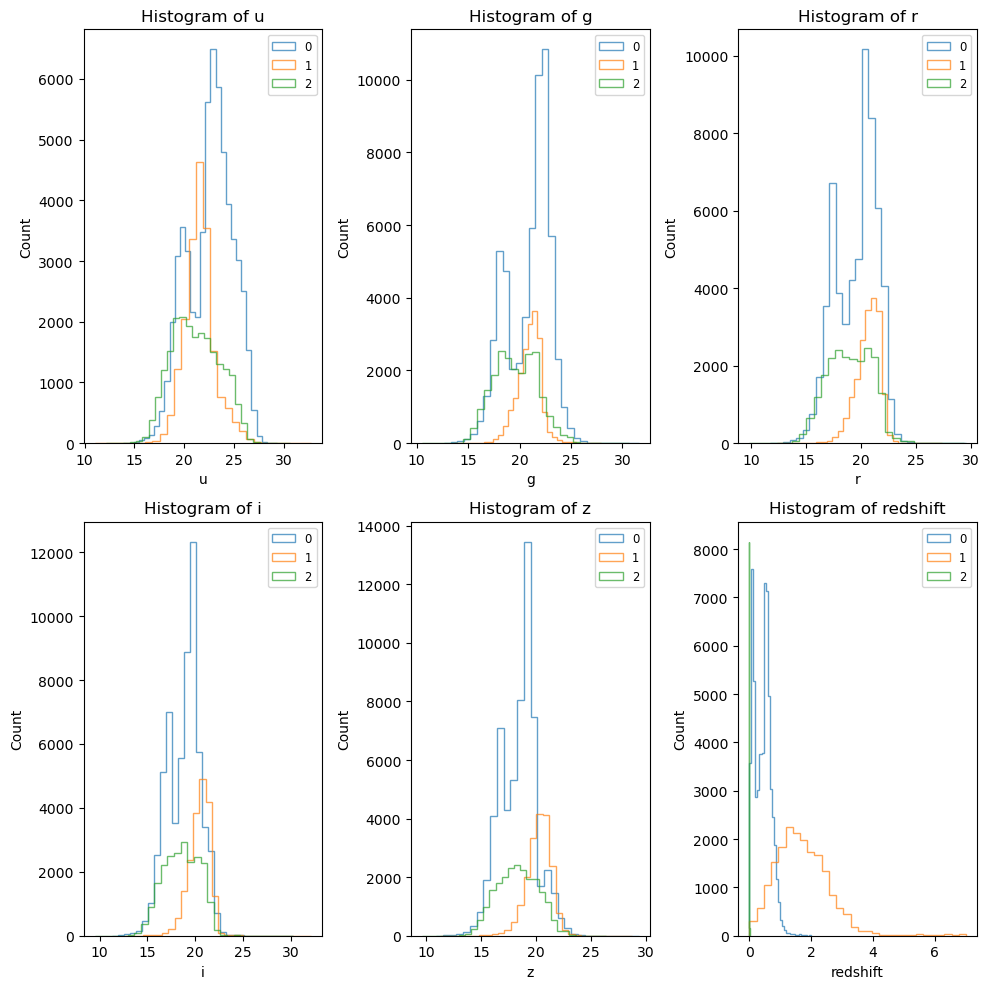

In [181]:
# Suppose your DataFrame is `df` and your target column is "class"
fig, axs = plot_histograms_by_class(
    df_only_numbah,
    target_col='target'
)

In [183]:
import numpy as np
import matplotlib.pyplot as plt

def plot_correlation_heatmap(
    df,
    columns=None,
    figsize=(10, 10),
    cmap='viridis',
    annot=True,
    fmt=".2f",
    title="Correlation Matrix Heatmap",
    rotation=45
):
    """
    Plot a correlation matrix heatmap for the given DataFrame columns.

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame.
    columns : list-like, optional
        Subset of columns to include. If None, all df.columns are used.
    figsize : tuple, optional
        Figure size in inches (default: (10, 10)).
    cmap : str or matplotlib Colormap, optional
        Colormap for the heatmap (default: 'viridis').
    annot : bool, optional
        Whether to annotate cells with correlation values (default: True).
    fmt : str, optional
        Format string for annotations (default: ".2f").
    title : str, optional
        Title of the plot (default: "Correlation Matrix Heatmap").
    rotation : float, optional
        Rotation angle for x-axis labels (default: 45 degrees).

    Returns
    -------
    fig : matplotlib.figure.Figure
        The created Figure object.
    ax : matplotlib.axes.Axes
        The created Axes object.
    """
    if columns is None:
        columns = df.columns
    corr = df[columns].corr()

    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(corr, interpolation='nearest', cmap=cmap)

    ticks = np.arange(len(columns))
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(columns)
    ax.set_yticklabels(columns)
    plt.setp(ax.get_xticklabels(), rotation=rotation, ha="right", rotation_mode="anchor")

    if annot:
        for i in range(len(columns)):
            for j in range(len(columns)):
                ax.text(j, i, f"{corr.iat[i, j]:{fmt}}", ha="center", va="center")

    ax.set_title(title)
    fig.colorbar(im, ax=ax)
    plt.tight_layout()
    plt.show()

    return fig, ax

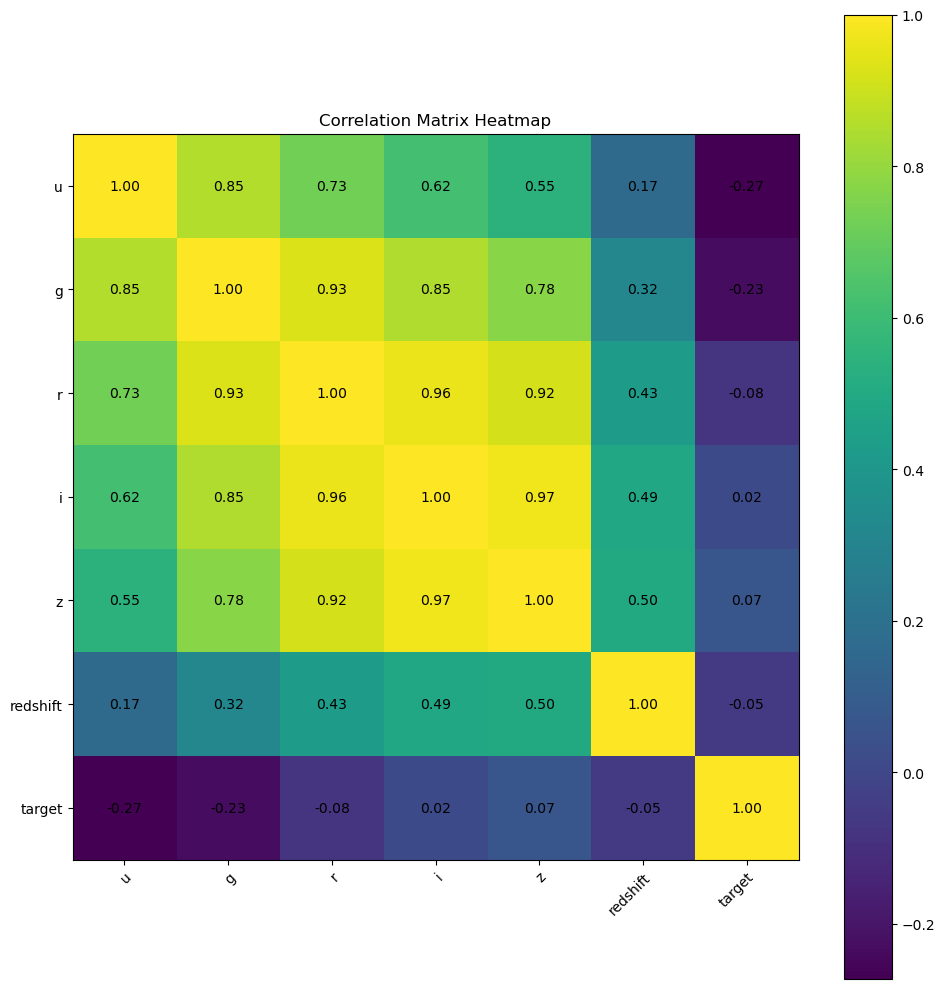

In [185]:
# For your df_only_numbah DataFrame:
fig, ax = plot_correlation_heatmap(df_only_numbah, figsize=(10,10))

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_boxplots_by_class(
    df, 
    target_col,
    class_order=None,
    figsize=(15, 15),
    patch_artist=True,
    **boxplot_kwargs
):
    """
    Plot boxplots for each feature in df, split by class.

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame containing features and the target column.
    target_col : str
        Name of the column in df that contains class labels.
    class_order : list-like, optional
        Specific order of class labels. If None, uses unique values in target_col.
    figsize : tuple, optional
        Figure size in inches (default: (15, 15)).
    patch_artist : bool, optional
        Whether to apply patch_artist to boxplot (default: True to allow facecolors).
    **boxplot_kwargs : dict
        Other keyword args to pass to ax.boxplot, e.g. notch=True.

    Returns
    -------
    fig : matplotlib.figure.Figure
        The created Figure object.
    axs : numpy.ndarray
        Flattened array of Axes objects.
    """
    features = df.columns.drop(target_col)
    n_features = len(features)

    # Compute grid dimensions
    ncols = int(np.ceil(np.sqrt(n_features)))
    nrows = int(np.ceil(n_features / ncols))

    fig, axs = plt.subplots(nrows, ncols, figsize=figsize)
    axs = axs.flatten()

    # Determine class labels
    classes = class_order if class_order is not None else df[target_col].unique()
    labels = [str(c) for c in classes]

    # Plot boxplots per feature
    for i, feature in enumerate(features):
        ax = axs[i]
        data_to_plot = [
            pd.to_numeric(df[df[target_col] == c][feature].dropna(), errors='coerce').values
            for c in classes
        ]
        # Use tick_labels to avoid deprecation warning
        ax.boxplot(data_to_plot, patch_artist=patch_artist, tick_labels=labels, **boxplot_kwargs)
        ax.set_xlabel(feature)
        ax.set_ylabel("Value")
        ax.set_title(f"Boxplot for {feature} across classes")

    # Remove unused axes
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()
    return fig, axs


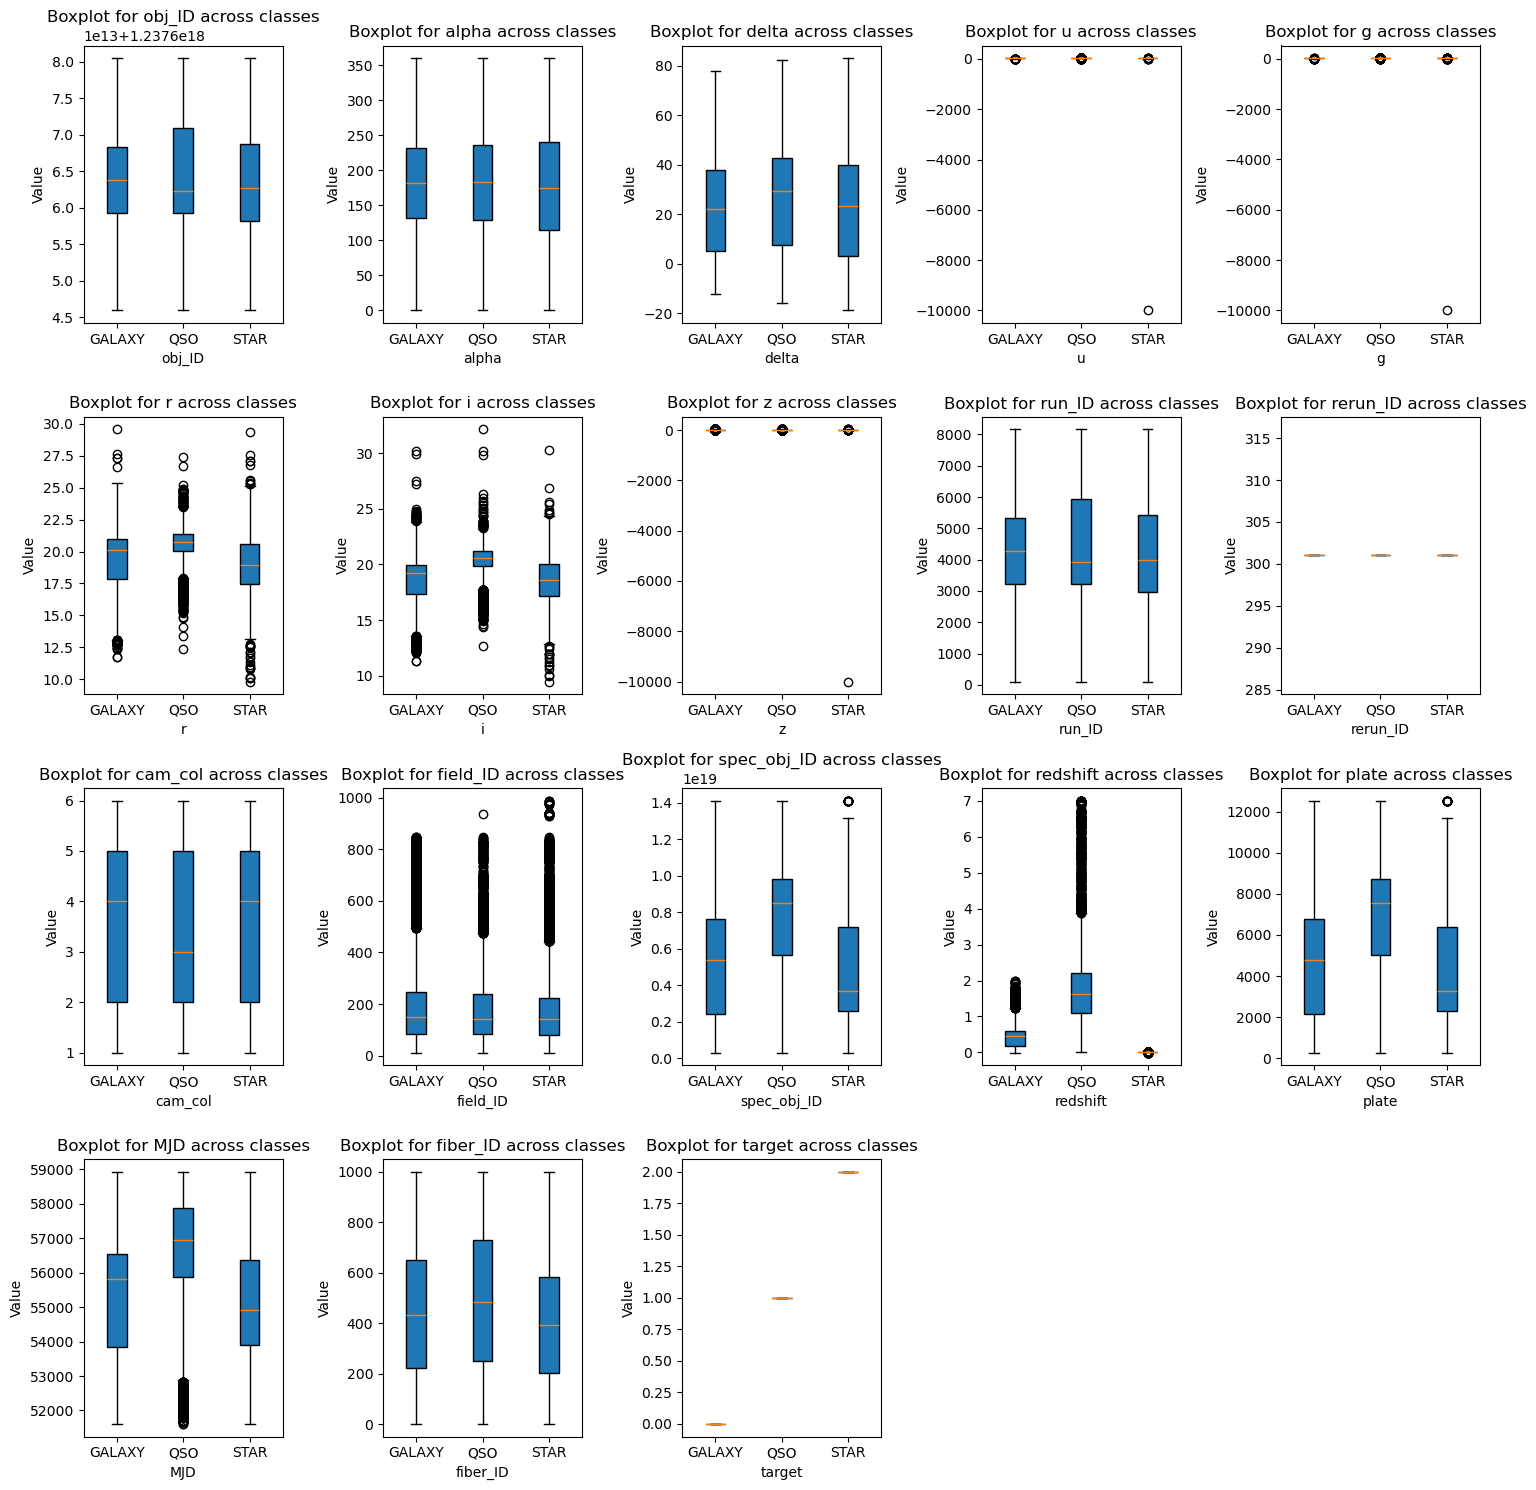

In [195]:
# Basic call
fig, axs = plot_boxplots_by_class(df, target_col='class')



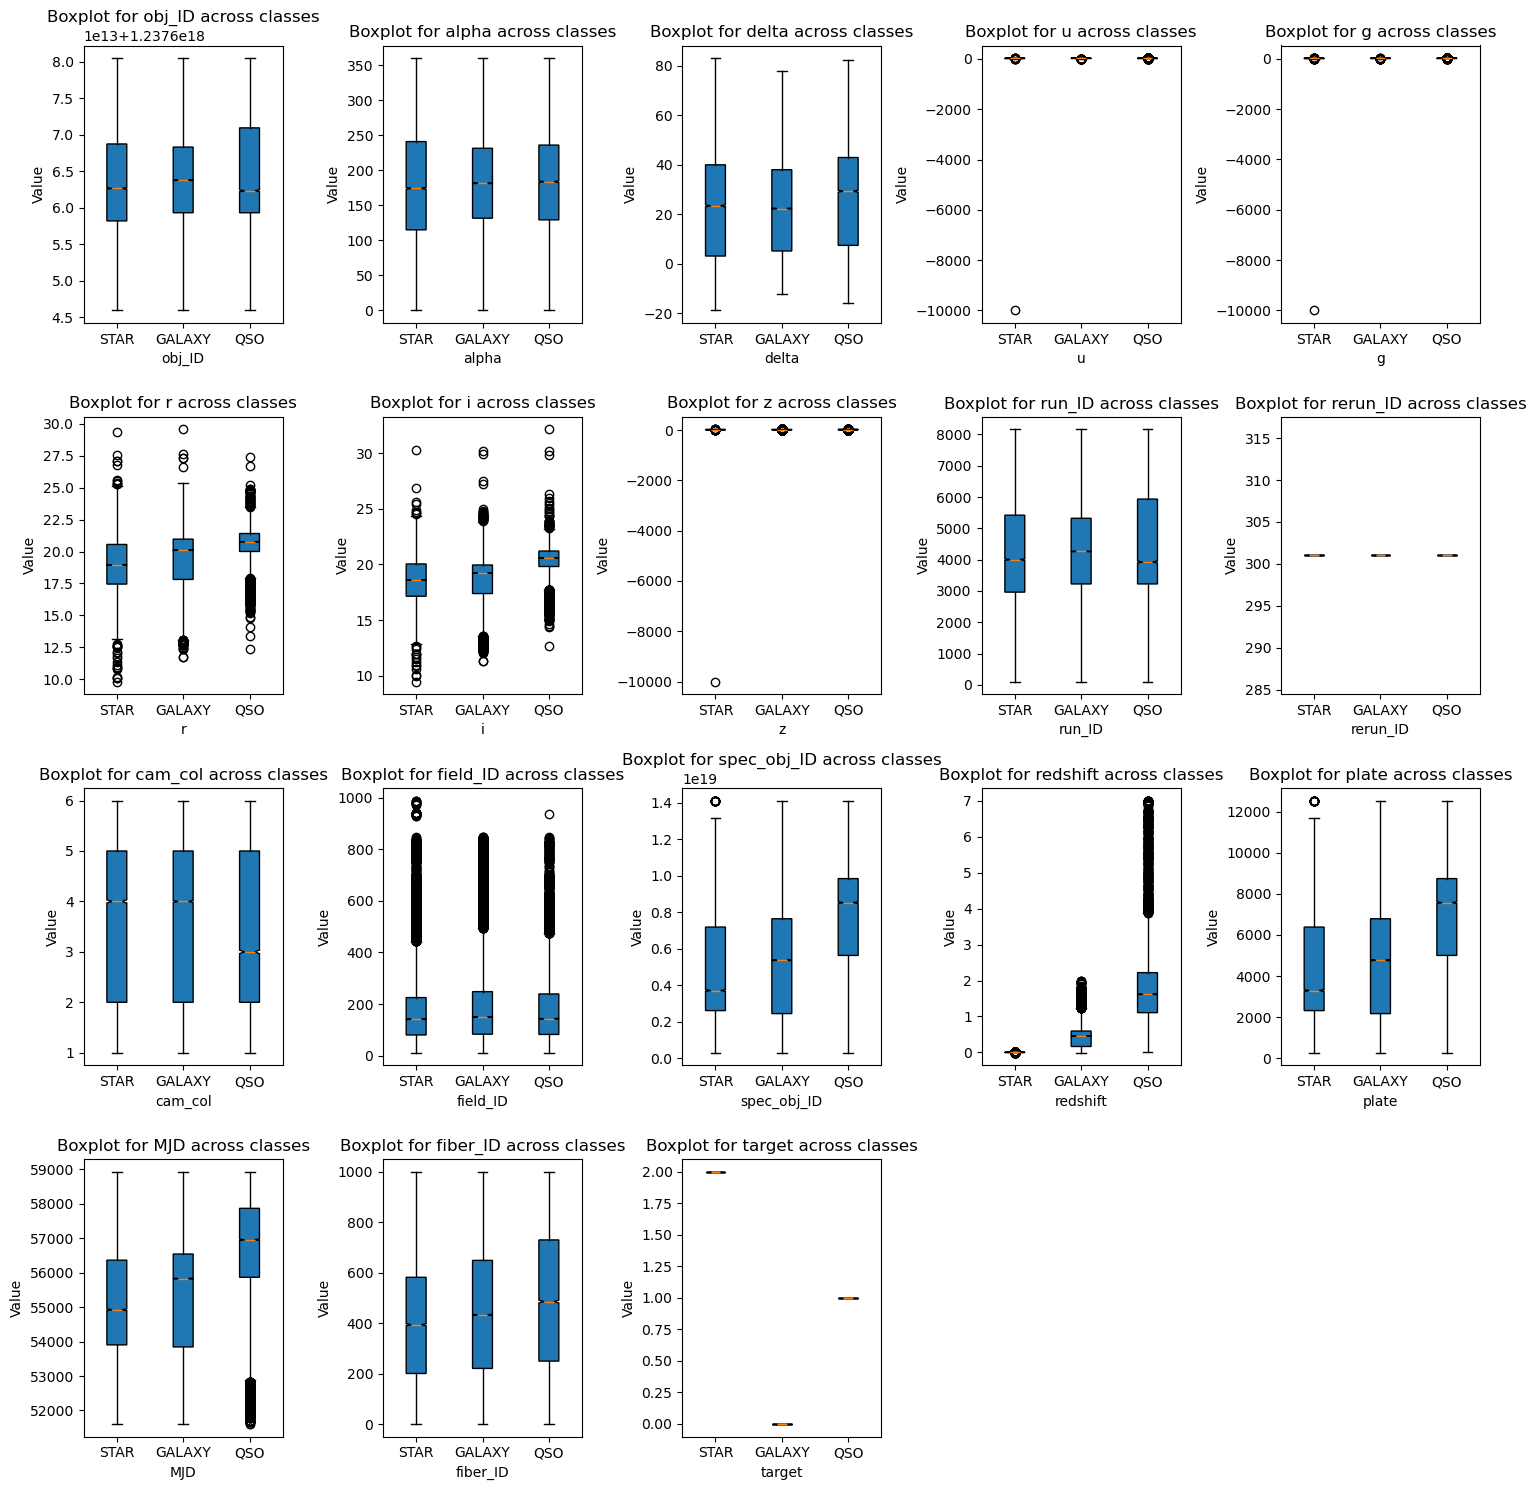

In [196]:
# With a specific class order and a notch style
fig, axs = plot_boxplots_by_class(
    df, 
    target_col='class',
    class_order=['STAR', 'GALAXY', 'QSO'],
    notch=True
)